<a href="https://colab.research.google.com/github/RomanKunal/Deep-Learning/blob/main/Checking_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEM STATEMENT :-
The objective is to develop a predictive model that estimates house prices in California based on various influencing factors such as location, median income, population density, proximity to the ocean, and other relevant attributes. This model aims to assist stakeholders like real estate developers, home buyers, and policymakers in understanding the housing market dynamics, making informed decisions, and identifying trends.


#KEY OBJECTIVES:-
1. Analyze historical housing data from California.
2. Identify critical features affecting house prices.
3. Build a robust machine learning model to predict house prices with high accuracy.
4. Provide insights into the housing market to facilitate better decision-making.


#CHALLENGES:-
1. Handling missing or incomplete data in the dataset.
2. Addressing data outliers and skewed distributions.
3. Ensuring the model generalizes well to unseen data.
4. Balancing model complexity and interpretability for real-world applications.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the data
new_data=pd.read_csv("/content/housing.csv")
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#Copying the data into new file so that data can not be loss
data=new_data.copy()

In [6]:
#checking the null values
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
#checking the data shape
data.shape

(20640, 10)

In [8]:
#checking the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
#dropping the null values
data.dropna(inplace=True)

In [13]:
#checking the null values for cross check
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [14]:
#checking shape
data.shape

(20433, 10)

In [15]:
#checking info again
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [16]:
#checking the categorical values
data["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [17]:
#Splitting the data

X=data.drop("median_house_value",axis=1)
y=data["median_house_value"]

In [18]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

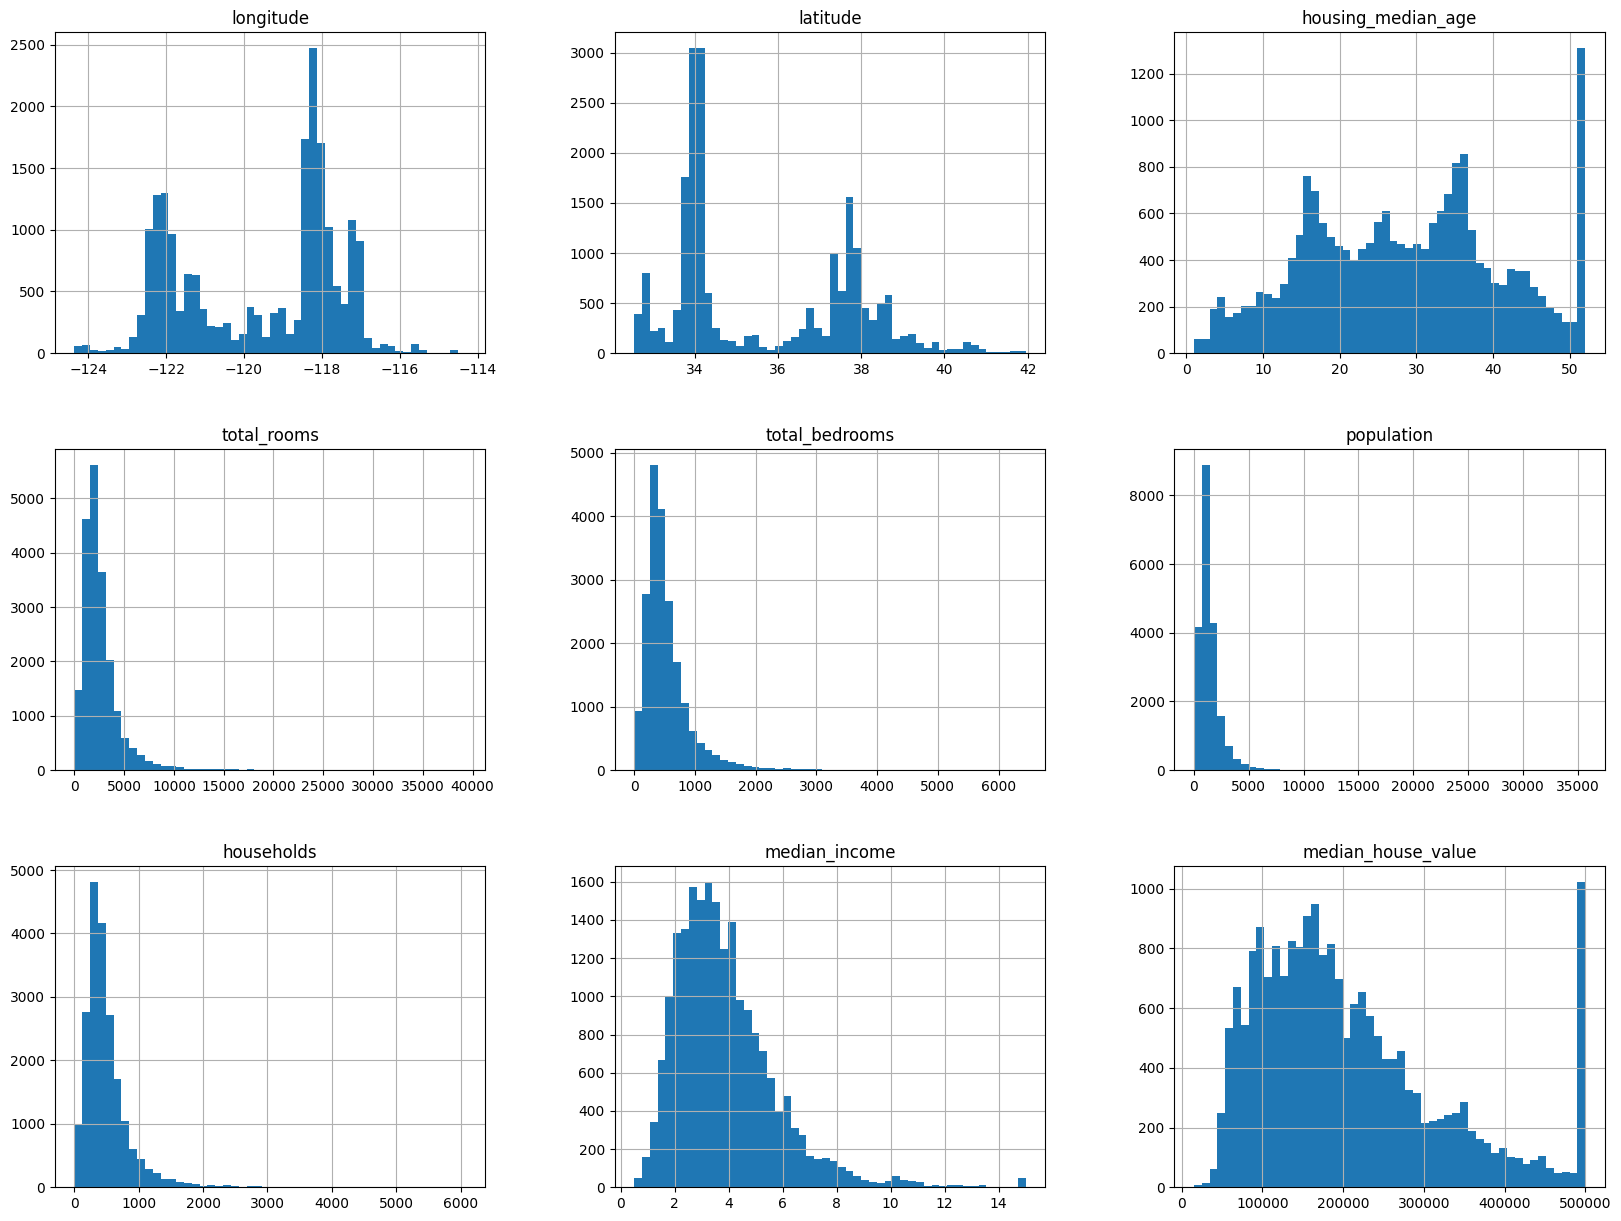

In [19]:
#checking histrogram
data.hist(bins=50,figsize=(20,15))
plt.show()

In [21]:
#changing the categorical column into ordinal values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["ocean_proximity"]=le.fit_transform(X["ocean_proximity"])

In [22]:
print(X.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity  
0       322.0       126.0         8.3252                3  
1      2401.0      1138.0         8.3014                3  
2       496.0       177.0         7.2574                3  
3       558.0       219.0         5.6431                3  
4       565.0       259.0         3.8462                3  


In [24]:
#checking which model is best for this problem
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.25)
}

def model_selection(models, X, y, cv_folds=5):
  results = []
  for name, model in models.items():
      print(f"Evaluating {name}...")
      # Cross-validate and calculate negative MSE scores
      cv_scores = cross_val_score(model, X, y, cv=cv_folds, scoring='neg_mean_squared_error')
      # Convert negative MSE to RMSE
      rmse_scores = np.sqrt(-cv_scores)
      mean_rmse = np.mean(rmse_scores)
      std_rmse = np.std(rmse_scores)
      results.append((name, mean_rmse, std_rmse))

    # Convert results into a DataFrame
  results_df = pd.DataFrame(results, columns=["Model", "Mean RMSE", "Std RMSE"])
  return results_df.sort_values(by="Mean RMSE", ascending=True)

model_results=model_selection(models,X,y)
print(model_results)




Evaluating Linear Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating XGBoost...
               Model     Mean RMSE      Std RMSE
3            XGBoost  66815.431982   2913.507828
0  Linear Regression  72009.951549   4232.346558
2      Random Forest  76685.769007  13928.098889
1      Decision Tree  97873.957400  13835.037568


In [25]:
#From above it is clear we will use XGBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


In [28]:
#fitting the model
model=XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.25)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
#checking accuracy
y_pred=model.predict(X_test)

In [30]:
#training score
train_r2 = model.score(X_train, y_train)
print(f"Training R² Score: {train_r2}")

Training R² Score: 0.9304913300530826


In [31]:
#testing score
test_r2 = model.score(X_test, y_test)
print(f"Test R² Score: {test_r2}")

Test R² Score: 0.829133388974142


In [32]:
#predicting
from sklearn.metrics import mean_squared_error
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")

Test RMSE: 48338.719429439465


# The accuracy is not what we expected so gonna use parameter tuning

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing

In [48]:
# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [49]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [51]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Define the XGBoost model
model = XGBRegressor(random_state=42)

In [59]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [200, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'min_child_weight': [1, 3],
    'subsample': [0.8]
}

In [60]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=2,
    verbose=1,
    n_jobs=-1
)

In [61]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [4, 6],
                         'min_child_weight': [1, 3], 'n_estimators': [200, 500],
                         'subsample': [0.8]},
             scoring='r2', verbose=1)

In [62]:
# Get the best model and evaluate it
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate R² score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Parameters:", grid_search.best_params_)
print(f"R² Score: {r2 * 100:.2f}%")
print(f"Test RMSE: {rmse:.2f}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}
R² Score: 84.67%
Test RMSE: 0.45


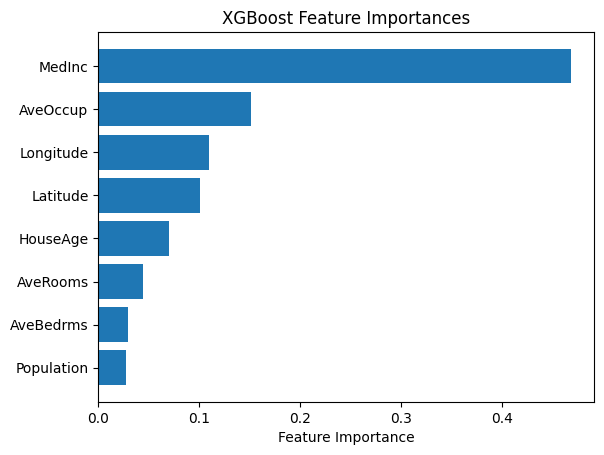

In [63]:
import matplotlib.pyplot as plt

# Plot feature importances
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances")
plt.show()